# Understanding the Basic Steps of EDA

In this Study, we will be predicting the price of a house given it's features.

1. Loading Dataset

2. Understanding the Data

3. Missing Values


4. Univarative Analysis for Response Variable

    4.1 Visualizing (Data distribution)
    
    4.2 Outlier Detection and Removal
    

5. Multivariative Analysis for Predictor Variables

    5.1 Visualizing (Data distribution)
    
    5.2 Feature Selection
    
    5.3 Removing Skewness
    
    
6. Correlation of Features


7. Model Fitting

    7.1 Splitting Data
    
    7.2 Normalizing Data
    
    7.3 Model Fitting
    
    7.4 Model Evaluation
   


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 1. Loading the Dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')

## 2. Understanding the Data

In [3]:
df.shape

(21613, 21)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The number of bathrooms and floors contains decimals hence giving the idea that data is not having high level of Varacity.
But, for this we will use the feature as our focus is the EDA process.

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We can drop the id as it has no significant meaning in effecting the house price and also the date column as it 
is of Obeject type.

In [7]:
df = df.drop(['id','date'],axis=1)

In [8]:
df.shape

(21613, 19)

## 3. Missing Values

In [9]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values seems to exists in the dataset. If missing values were encountered we can,
1) Impute

2) Remove

## 4. Univariate Analysis for Response Variable 

### 4.1 Visualizing

In [10]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

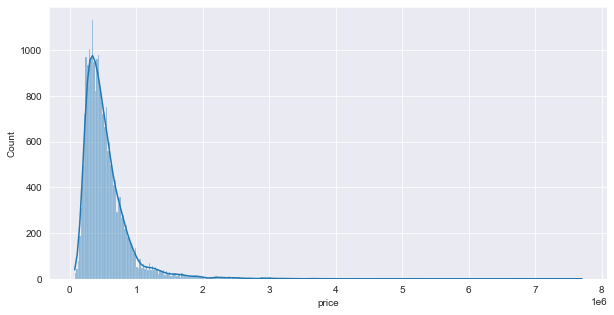

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['price'],kde=True)

We can observe the data is right skewed and possibly result of outliers. For further clarification of the outliers, we can use the boxplot.

<AxesSubplot:xlabel='price'>

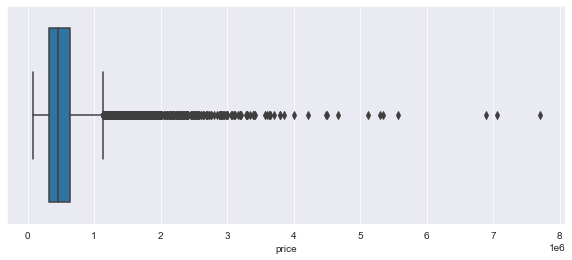

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x=df['price'])

### 4.2 Removing Outliers

Below methods can be used to remove outliers

1.Z-score treatment(When data is Normally distributed)

2.IQR based filtering (When data is Skewed)


In [13]:
# Finding the quartiles
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
print(percentile25,percentile75)

321950.0 645000.0


In [14]:
#Finding the upper and Lower Limit
interQuartileRange = percentile75-percentile25
lowerLmt = percentile25 - 1.5*interQuartileRange
upperLmt = percentile75 + 1.5*interQuartileRange

In [15]:
#Dropping out of range values
df1 = df[(df['price']>lowerLmt)&(df['price']<upperLmt)]

In [16]:
#Checking the shape
df1.shape

(20467, 19)

<AxesSubplot:xlabel='price', ylabel='Count'>

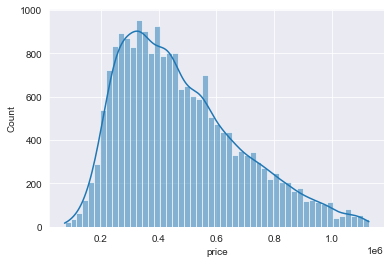

In [17]:
#Replotting the graphs
sns.histplot(data=df1,x=df1['price'],kde=True)

<AxesSubplot:xlabel='price'>

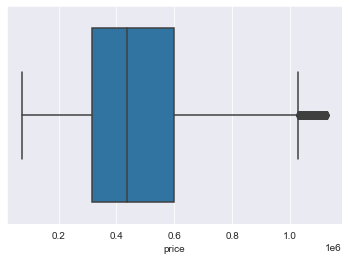

In [18]:
sns.boxplot(data=df1,x=df1['price'])

The number of outliers were significantly reduced

## 5. Multivariate Analysis for Predictor Variables

### 5.1 Understanding the Distribution of Features 

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

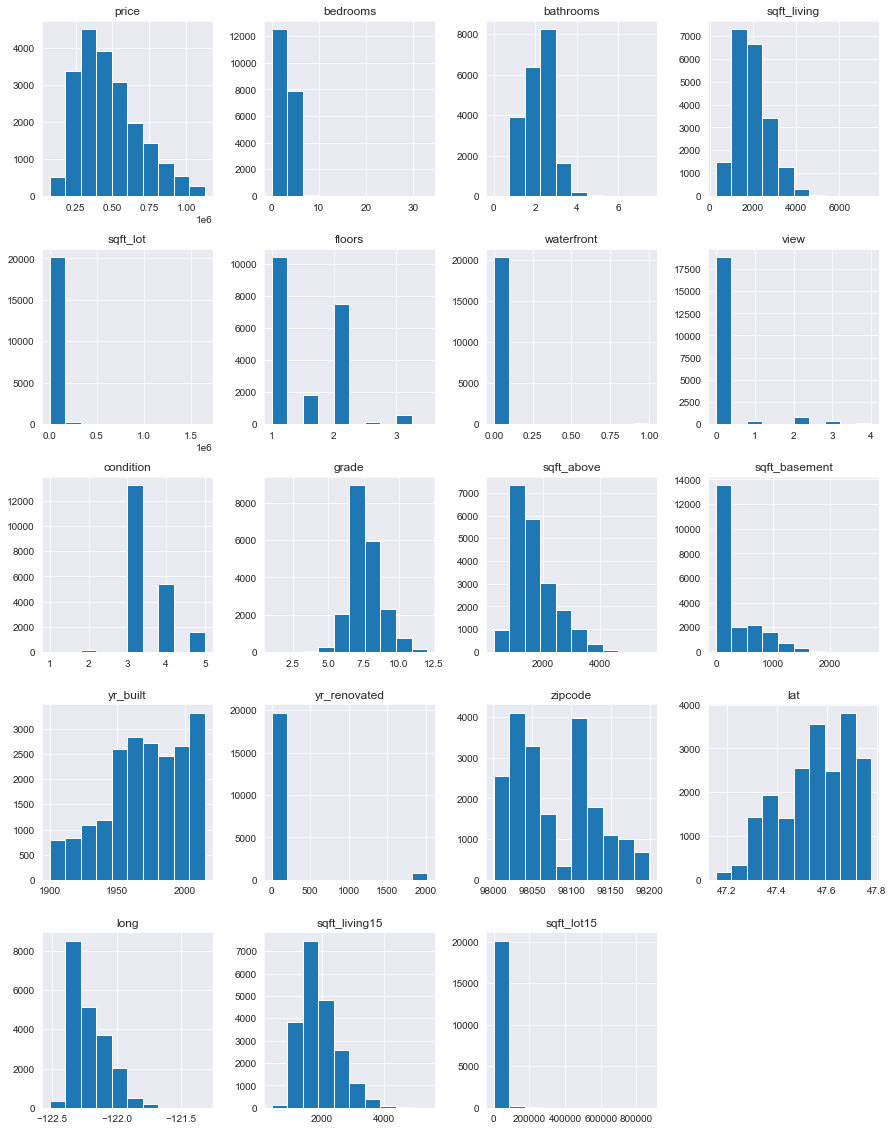

In [19]:
df1.hist(figsize=(15,20),bins=10)

It is observative that sqft_lot,waterfront,view,yr_renovated,sqft_lot15 features contain 0 for majority of the values hence we will remove these columns for more accurate predictions

### 5.2 Feature Selection

In [72]:
df2 = df1.drop(['sqft_lot','waterfront','yr_renovated','sqft_lot15','view'],axis=1)

In [73]:
df2.shape

(20467, 14)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

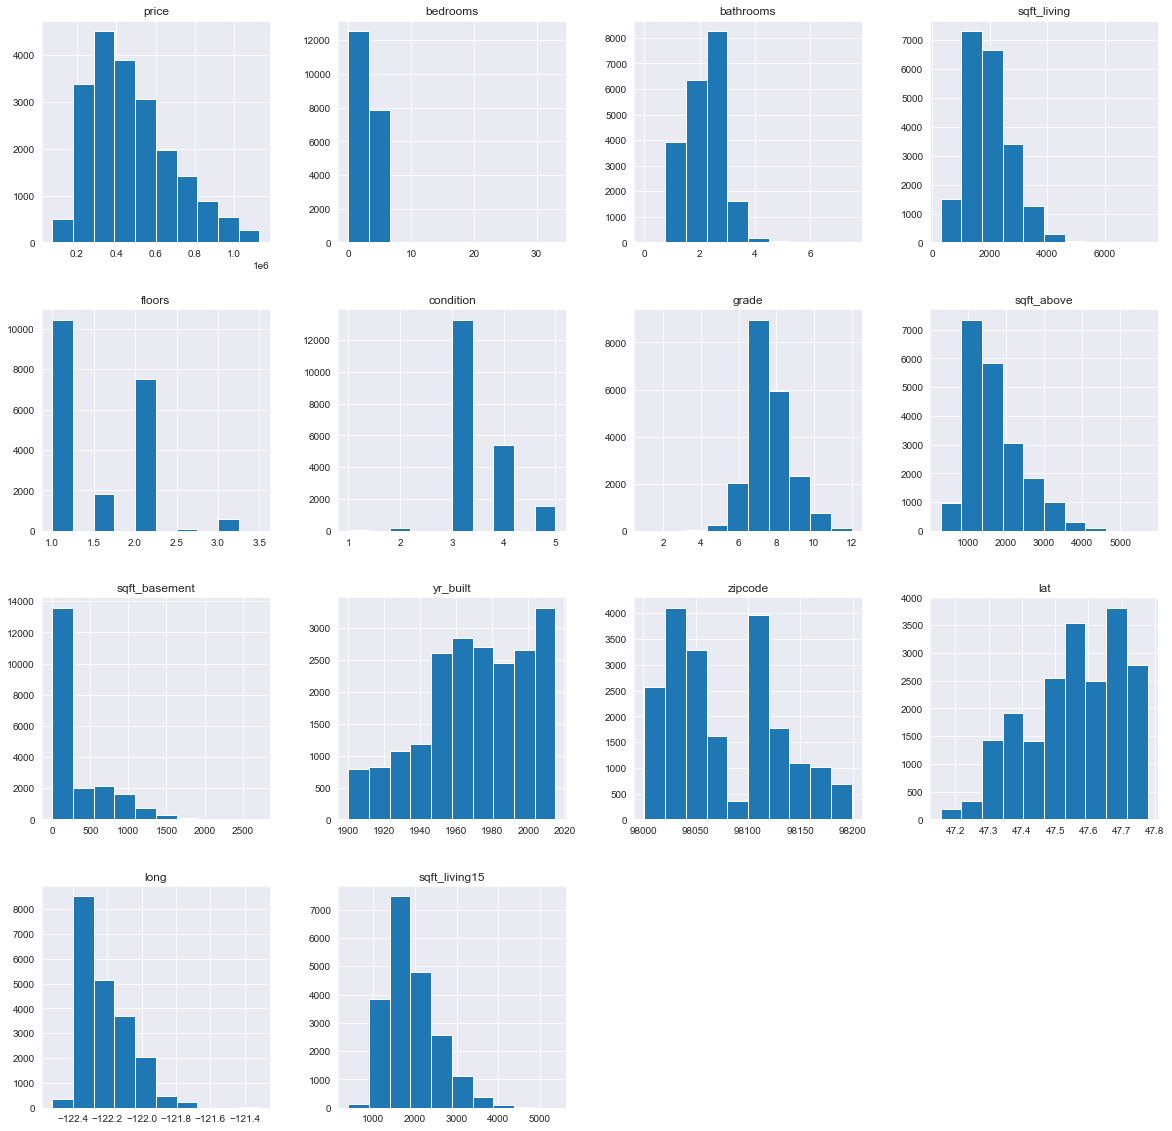

In [22]:
df2.hist(figsize=(20,20))

In [74]:
#Checking for 0s in columns
for column_name in df2.columns:
    column = df2[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  price  is :  0
Count of zeros in column  bedrooms  is :  12
Count of zeros in column  bathrooms  is :  9
Count of zeros in column  sqft_living  is :  0
Count of zeros in column  floors  is :  0
Count of zeros in column  condition  is :  0
Count of zeros in column  grade  is :  0
Count of zeros in column  sqft_above  is :  0
Count of zeros in column  sqft_basement  is :  12702
Count of zeros in column  yr_built  is :  0
Count of zeros in column  zipcode  is :  0
Count of zeros in column  lat  is :  0
Count of zeros in column  long  is :  0
Count of zeros in column  sqft_living15  is :  0


Number of bedrooms and bathrooms cannot be 0 hence let's drop the rows with 0 values

In [75]:
df2= df2[(df2['bedrooms'] != 0) & (df2['bathrooms'] != 0)]

### 5.3 Removing Skewness

In [76]:
#https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

# df2['price'] = np.log(df2['price'])
df2['bedrooms'] = np.log(df2['bedrooms'])
df2['bathrooms'] = np.log(df2['bathrooms'])
df2['sqft_living'] = np.log(df2['sqft_living'])
df2['floors'] = np.log(df2['floors'])
df2['condition'] = np.log(df2['condition'])
df2['grade'] = np.log(df2['grade'])
df2['sqft_above'] = np.log(df2['sqft_above'])
df2.loc[df2['sqft_basement']>0,'sqft_basement'] = np.log(df2['sqft_basement'])
df2['yr_built'] = np.log(df2['yr_built'])
df2['zipcode'] = np.log(df2['zipcode'])
df2['lat'] = np.log(df2['lat'])
df2['long'] = np.log(df2['long'])
df2['sqft_living15'] = np.log(df2['sqft_living15'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

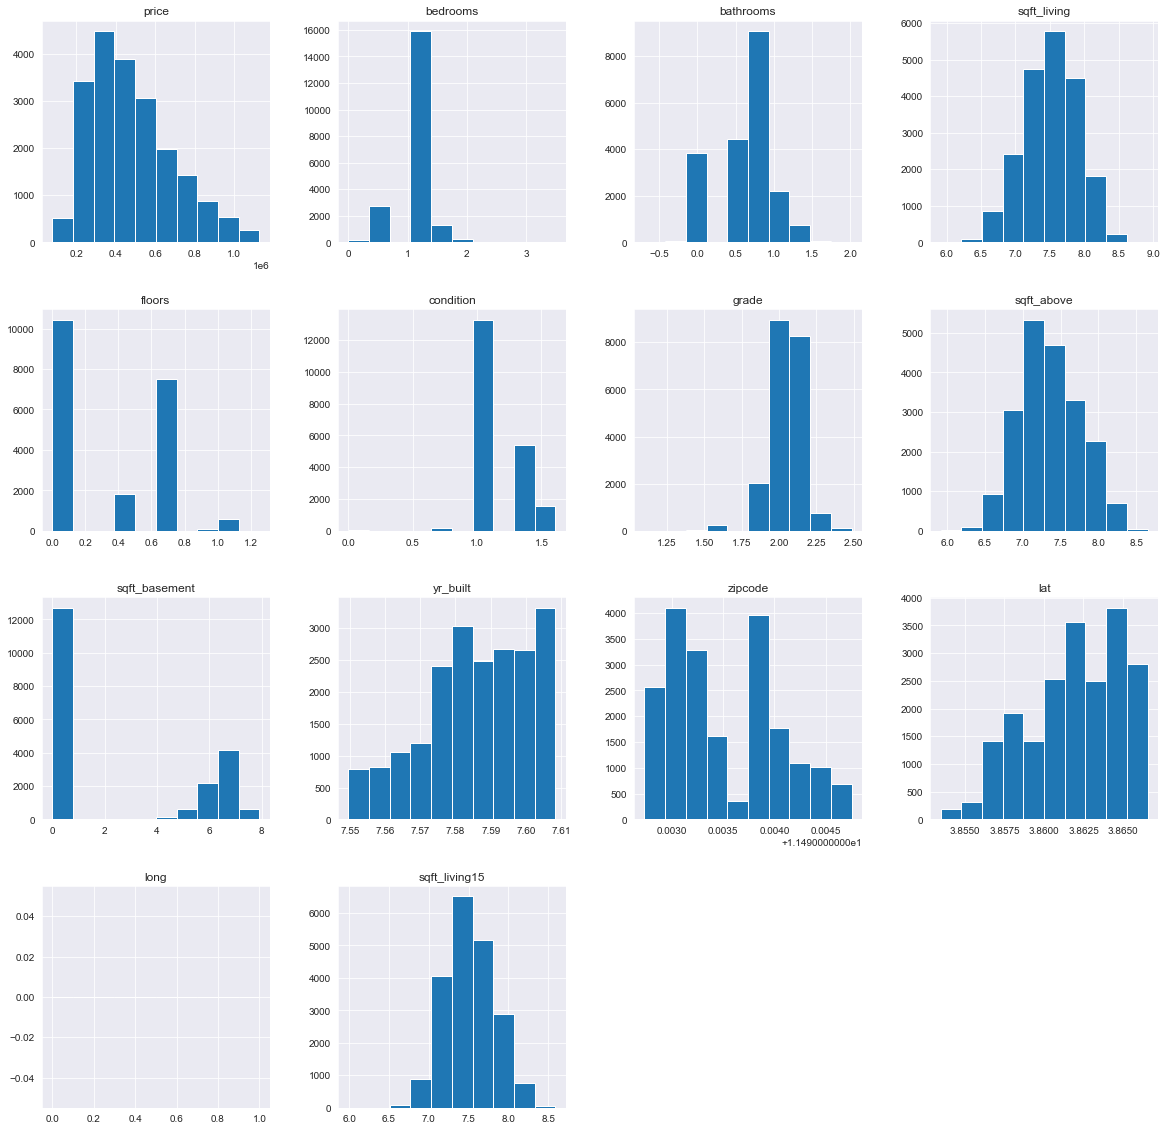

In [77]:
df2.hist(figsize=(20,20))
# print(df2['price'])

## 6. Correlation of Features 

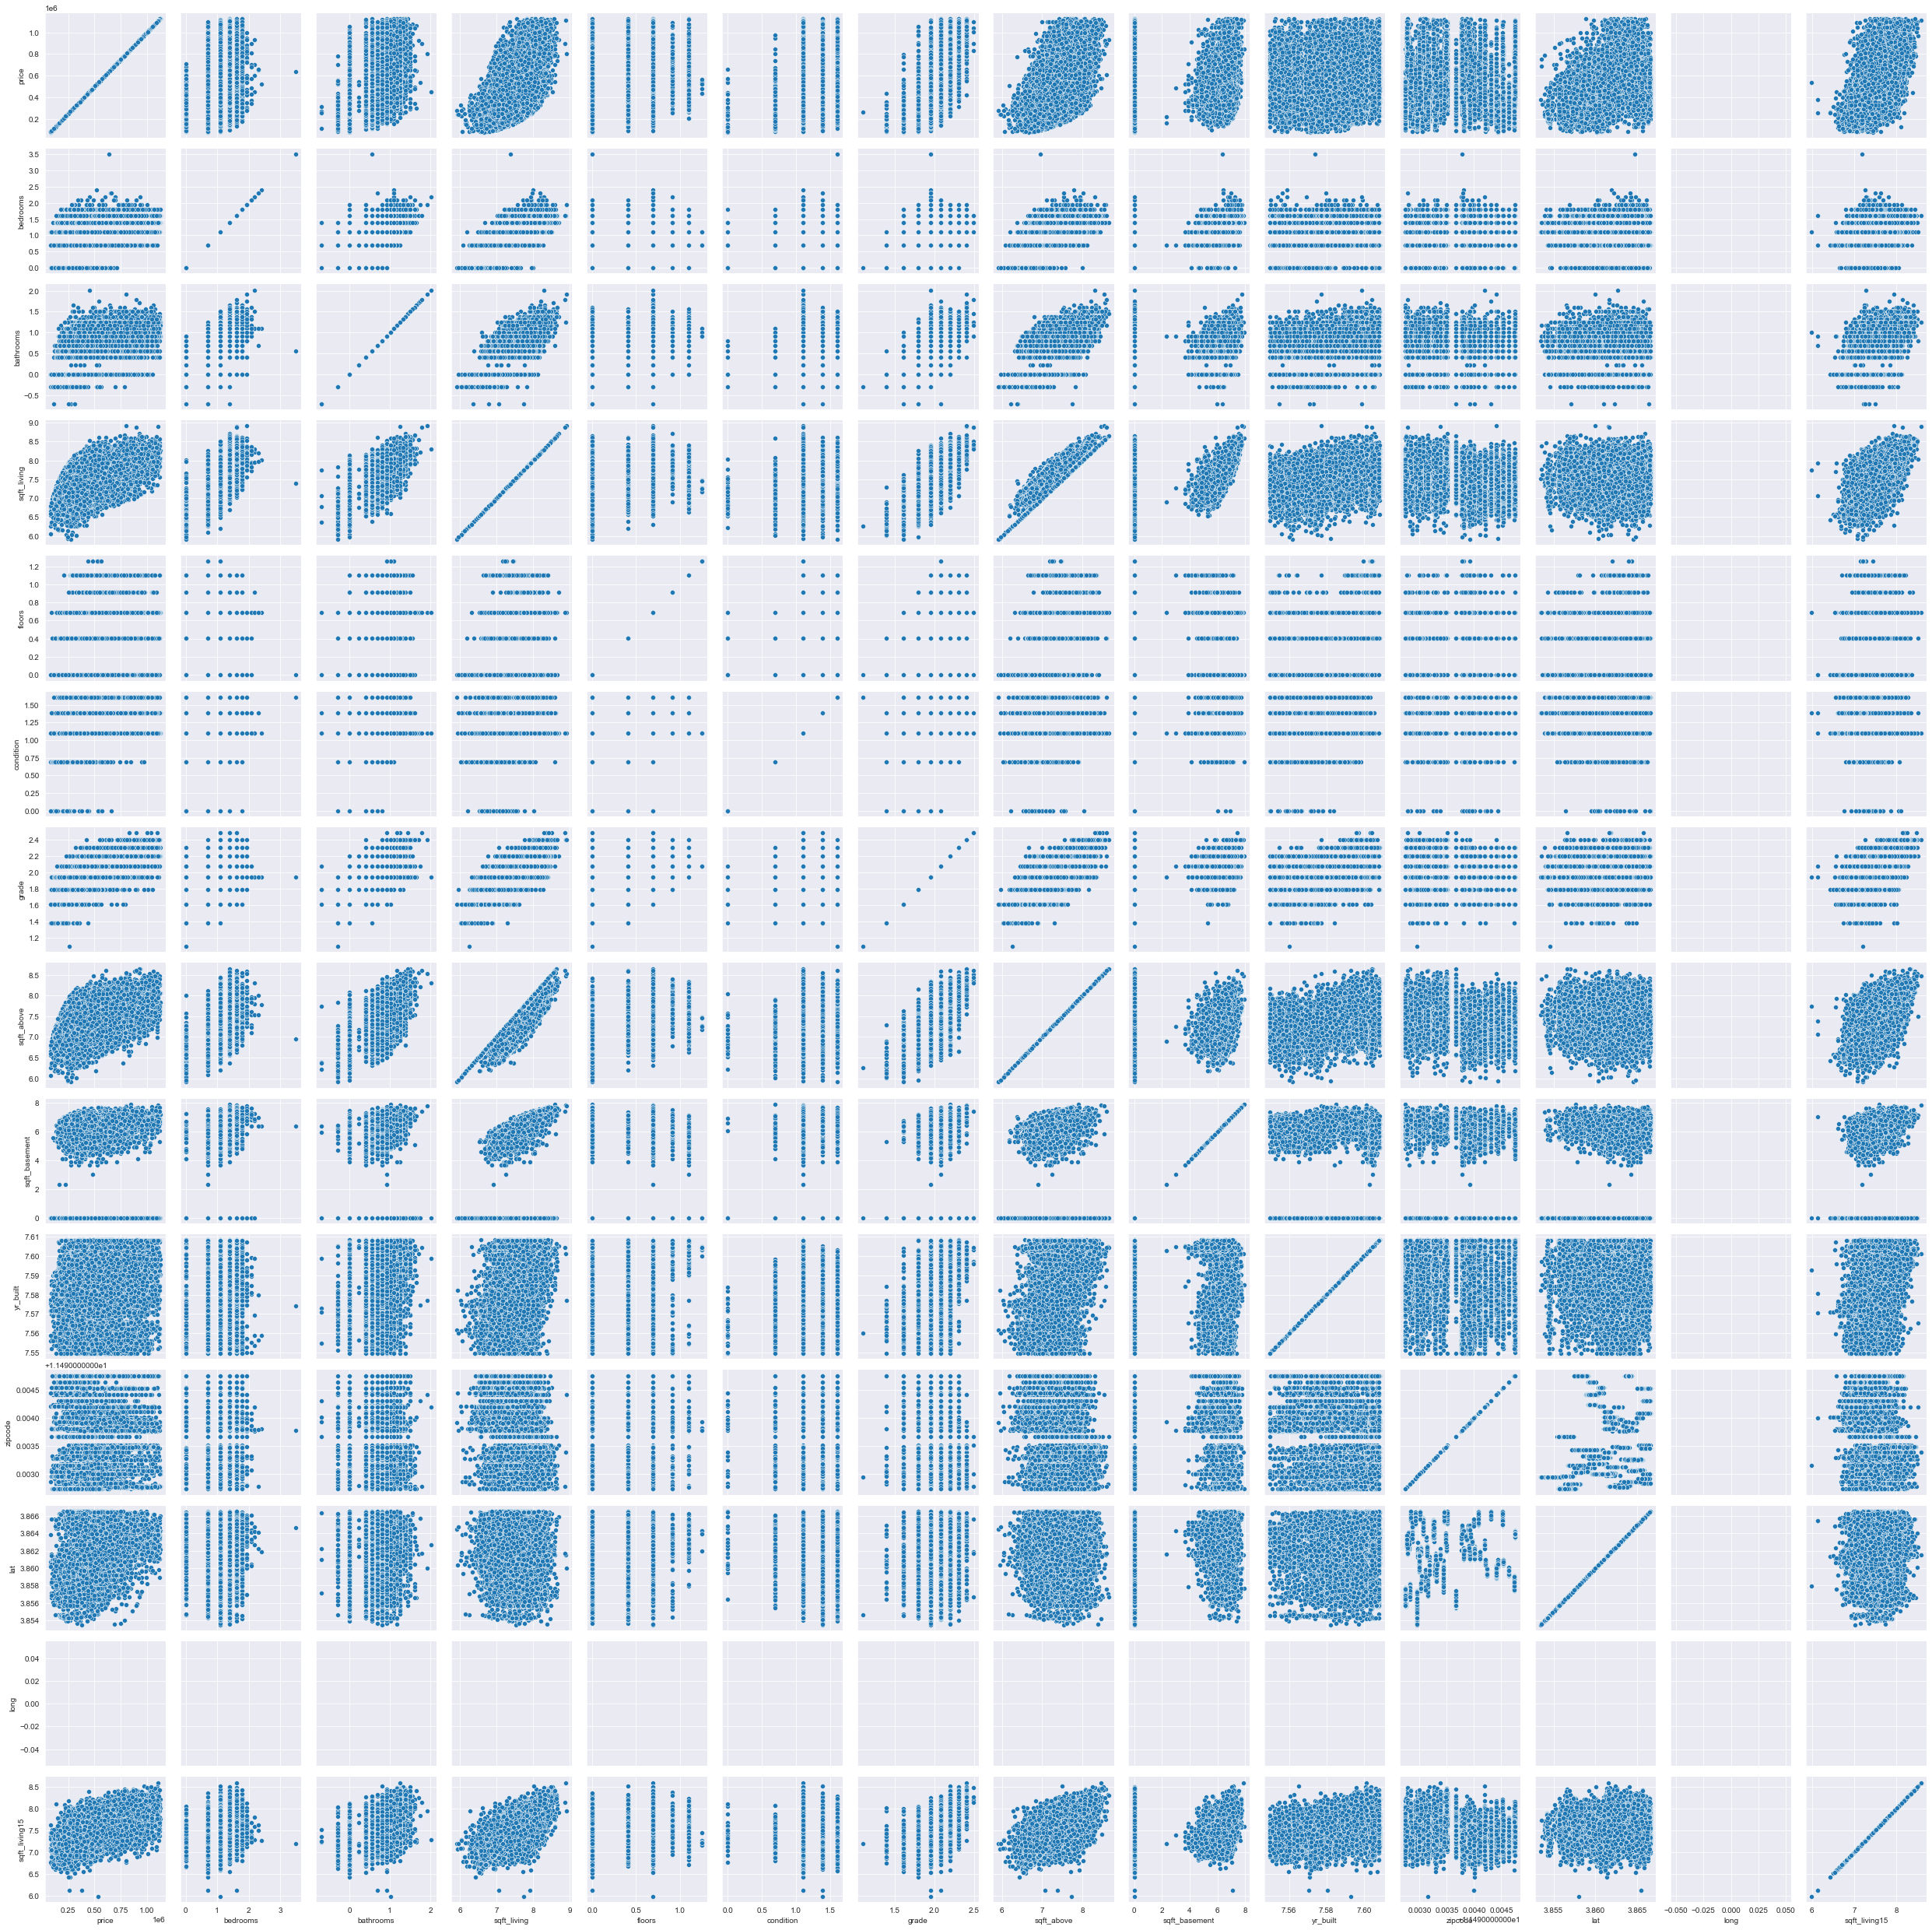

In [78]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)

<Figure size 1440x360 with 0 Axes>

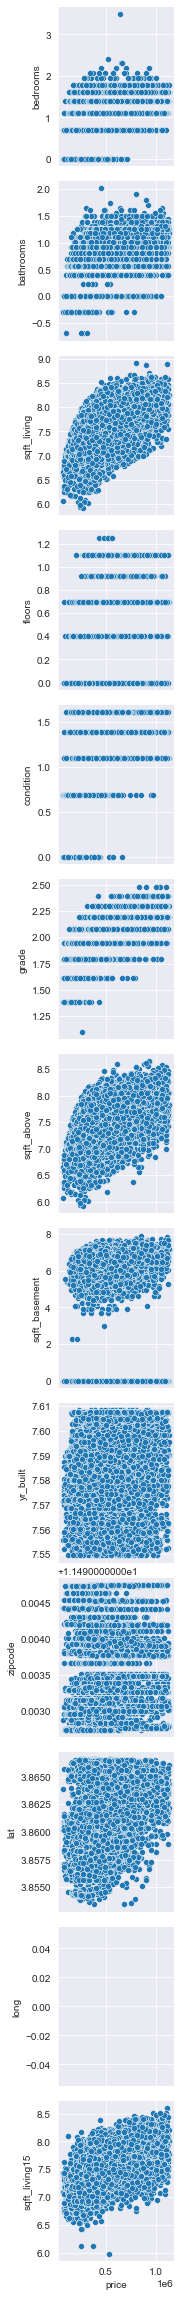

In [79]:
plt.figure(figsize=(20,5))
df3 = df2.drop(['price'],axis=1)
pp = sns.pairplot(data=df2,
                  x_vars=['price'],
                  y_vars=df3,)

We can observe that the square feet of the house have a strong linear relationship with the response variable. And some other features such as zip code does not show any relationship. To further understand, we will plot the heatmap.

In [82]:
df2 = df2.drop(['long','lat','zipcode'],axis = 1)
print(max(y))

KeyError: "['long' 'lat' 'zipcode'] not found in axis"

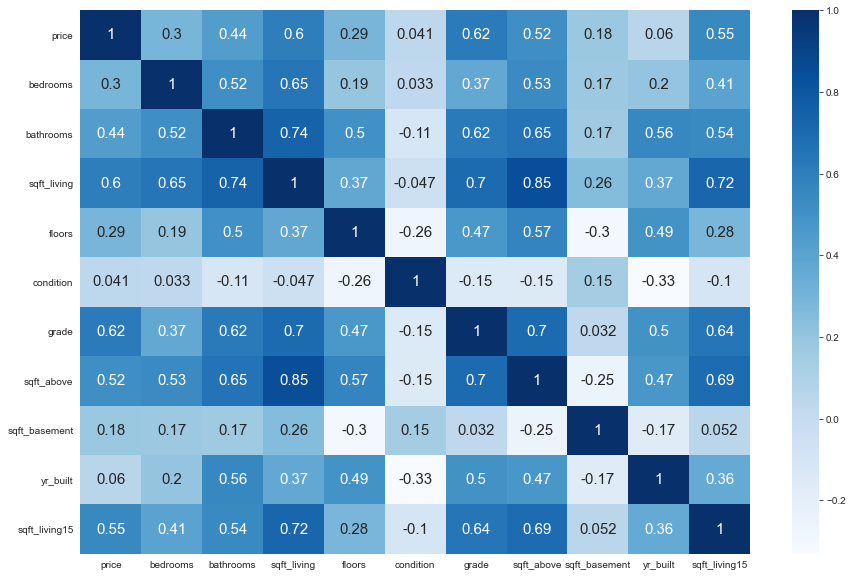

In [83]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df2.corr(), 
                 annot=True, 
                 annot_kws={'size':15}, 
                cmap='Blues')

## 7. Model Fitting

### 7.1 Splitting the Data

In [84]:
X = df2.drop(['price'],axis=1) 
y = df2['price']
print(max(y))
# print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

1127500.0


### 7.2 Normalizing Data 

In [85]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### 7.3 Model Fitting 

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred = model.predict(X_test)
print(y_pred)

[373259.96510928 461641.72950298 609726.22713588 ... 555758.14907344
 410595.12791649 470156.29227128]


### 7.4 Model Evaluation 

In [92]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

139406.80047601552